In [56]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import scipy.optimize as opt
import statsmodels.api as sm

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

messages_initial = pd.read_csv('day_wise.csv')

In [58]:
messages = []
for i in range(len(messages_initial['Confirmed'])):
    num = messages_initial['Confirmed'][i]
    if(i!=0):
        num = messages_initial['Confirmed'][i] - messages_initial['Confirmed'][i-1]
    
    messages.append(num)

print(messages)

[555, 99, 287, 493, 684, 809, 2651, 588, 2068, 1693, 2111, 4749, 3100, 4011, 3745, 3159, 3532, 2734, 3027, 2538, 2042, 1886, 13645, 6484, 2075, 2114, 1936, 1794, 421, 547, 629, 1761, 323, 564, 853, 963, 1364, 1377, 1895, 2384, 1974, 2577, 2299, 2791, 3943, 4038, 3954, 3900, 5024, 7663, 5750, 14405, 11106, 11146, 14659, 15838, 19586, 27918, 29608, 32306, 33410, 42165, 41139, 50817, 62960, 64400, 67657, 59577, 64639, 76416, 76214, 81399, 83155, 80463, 71718, 72672, 76873, 83775, 86625, 87658, 76965, 96781, 69594, 69927, 80829, 96712, 87724, 73957, 80523, 73339, 75250, 76806, 89013, 86940, 84932, 72947, 68704, 75299, 77046, 83681, 87046, 81686, 77636, 76077, 79989, 90022, 89086, 91517, 85846, 76246, 76241, 83599, 84752, 97105, 96349, 95412, 78509, 88284, 96424, 103028, 106334, 106900, 105289, 95326, 86963, 92522, 102600, 119314, 121167, 137833, 107552, 95195, 120811, 119388, 126937, 130863, 135942, 112259, 102225, 124342, 134025, 138114, 129094, 136010, 133421, 119638, 141403, 141853, 139

In [59]:
print(messages)

[555, 99, 287, 493, 684, 809, 2651, 588, 2068, 1693, 2111, 4749, 3100, 4011, 3745, 3159, 3532, 2734, 3027, 2538, 2042, 1886, 13645, 6484, 2075, 2114, 1936, 1794, 421, 547, 629, 1761, 323, 564, 853, 963, 1364, 1377, 1895, 2384, 1974, 2577, 2299, 2791, 3943, 4038, 3954, 3900, 5024, 7663, 5750, 14405, 11106, 11146, 14659, 15838, 19586, 27918, 29608, 32306, 33410, 42165, 41139, 50817, 62960, 64400, 67657, 59577, 64639, 76416, 76214, 81399, 83155, 80463, 71718, 72672, 76873, 83775, 86625, 87658, 76965, 96781, 69594, 69927, 80829, 96712, 87724, 73957, 80523, 73339, 75250, 76806, 89013, 86940, 84932, 72947, 68704, 75299, 77046, 83681, 87046, 81686, 77636, 76077, 79989, 90022, 89086, 91517, 85846, 76246, 76241, 83599, 84752, 97105, 96349, 95412, 78509, 88284, 96424, 103028, 106334, 106900, 105289, 95326, 86963, 92522, 102600, 119314, 121167, 137833, 107552, 95195, 120811, 119388, 126937, 130863, 135942, 112259, 102225, 124342, 134025, 138114, 129094, 136010, 133421, 119638, 141403, 141853, 139

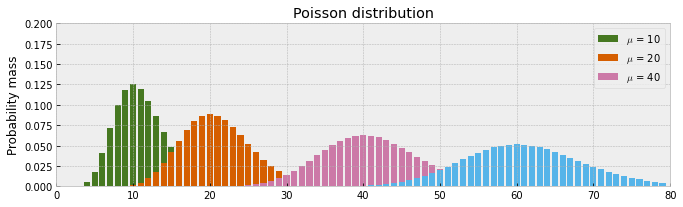

In [47]:
fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(111)
x_lim = 80
mu = [10, 20, 40, 60]
for i in np.arange(x_lim):
    plt.bar(i, stats.poisson.pmf(mu[0], i), color=colors[3])
    plt.bar(i, stats.poisson.pmf(mu[1], i), color=colors[4])
    plt.bar(i, stats.poisson.pmf(mu[2], i), color=colors[5])
    plt.bar(i, stats.poisson.pmf(mu[3], i), color=colors[6])
    
_ = ax.set_xlim(0, x_lim)
_ = ax.set_ylim(0, 0.2)
_ = ax.set_ylabel('Probability mass')
_ = ax.set_title('Poisson distribution')
_ = plt.legend(['$\mu$ = %s' % mu[0], '$\mu$ = %s' % mu[1], '$\mu$ = %s' % mu[2]])

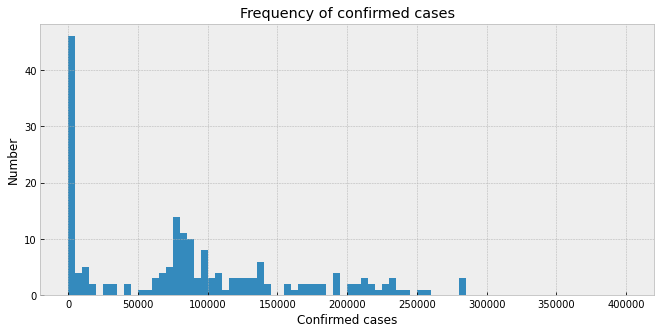

In [62]:
fig = plt.figure(figsize=(11,5))
_ = plt.title('Frequency of confirmed cases')
_ = plt.xlabel('Confirmed cases')
_ = plt.ylabel('Number')
_ = plt.hist(messages, 
             range=[0, 400000], bins=80, histtype='stepfilled')

In [63]:
y_obs = messages

def poisson_logprob(mu, sign=-1):
    return np.sum(sign*stats.poisson.logpmf(y_obs, mu=mu))

freq_results = opt.minimize_scalar(poisson_logprob)
%time print("The estimated value of mu is: %s" % freq_results['x'])

The estimated value of mu is: 87662.1551779207
CPU times: user 656 µs, sys: 0 ns, total: 656 µs
Wall time: 663 µs


/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


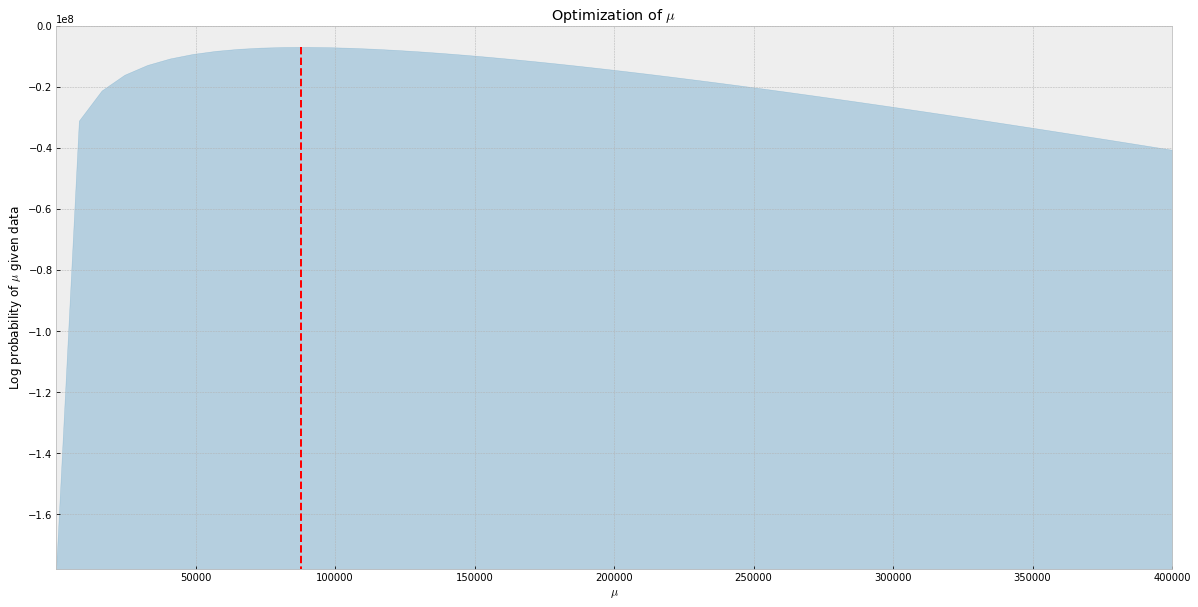

In [68]:
x = np.linspace(1, 400000)
y_min = np.min([poisson_logprob(i, sign=1) for i in x])
y_max = np.max([poisson_logprob(i, sign=1) for i in x])
fig = plt.figure(figsize=(20,10))
# _ = plt.plot(x, [poisson_logprob(i, sign=1) for i in x])
_ = plt.plot(x)
_ = plt.fill_between(x, [poisson_logprob(i, sign=1) for i in x], 
                     y_min, color=colors[0], alpha=0.3)
_ = plt.title('Optimization of $\mu$')
_ = plt.xlabel('$\mu$')
_ = plt.ylabel('Log probability of $\mu$ given data')
_ = plt.vlines(freq_results['x'], y_max, y_min, colors='red', linestyles='dashed')
# _ = plt.scatter(freq_results['x'], y_max, s=110, c='red', zorder=3)
_ = plt.ylim(ymin=y_min, ymax=0)
_ = plt.xlim(xmin=1, xmax=400000)